# CodeRefinery pre-workshop survey

As part of the registration to a CodeRefinery workshop, participants are asked to fill in a survey. This notebook contains analysis of the survey results.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import glob
from collections import Counter, defaultdict

In [9]:
# larger font in seaborn plots
sns.set(font_scale=2)

## Helper functions

In [26]:
# reduce annoying differences in column titles
def normalize_column_title(s):
    s = s.replace("Pre-workshop survey: ", "")
    s = s.replace("<strong>", "")
    s = s.replace("</strong>", "")
    return s

def read_csv_file(file_name):
    _df = pd.read_csv(file_name)
    _df = _df.rename(normalize_column_title, axis='columns')
    return _df

def extract_helper(df, approx_column_text):
    matching_columns = [c for c in df.columns if approx_column_text in c]
    if len(matching_columns) > 0:
        column = matching_columns[0]
        counts = df[column].value_counts()
        return counts.to_dict()
    else:
        return {}

def extract_counts(approx_column_text):
    counts_typeform = extract_helper(df_typeform, approx_column_text)
    counts_indico = extract_helper(df_indico, approx_column_text)
    combined = dict(Counter(counts_typeform) + Counter(counts_indico))
    counts = dict(sorted(combined.items(), key=lambda item: item[1], reverse=True))
    if "Mac OS X" in counts.keys():
        counts["macOS"] += counts["Mac OS X"]
        del counts["Mac OS X"]
    keys = list(counts.keys())
    values = [counts[k] for k in keys]
    return keys, values

# define an additional function to focus on online-workshops
def extract_counts_online(approx_column_text):
    counts_indico = extract_helper(df_indico_online, approx_column_text)
    combined = dict(Counter(counts_indico))
    counts = dict(sorted(combined.items(), key=lambda item: item[1], reverse=True))
    if "Mac OS X" in counts.keys():
        counts["macOS"] += counts["Mac OS X"]
        del counts["Mac OS X"]
    keys = list(counts.keys())
    values = [counts[k] for k in keys]
    return keys, values

def split_on_semicolon(keys, values):
    counts = defaultdict(int)
    for i, key in enumerate(keys):
        v = values[i]
        for word in key.split("; "):
            counts[word] += v
    counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))
    new_keys = list(counts.keys())
    new_values = [counts[k] for k in new_keys]
    return new_keys, new_values

## Read data

In [19]:
dfs = [read_csv_file(f) for f in glob.glob('data/typeform/20*/*.csv')]
df_typeform = pd.concat(dfs, ignore_index=False, keys=None)

dfs = [read_csv_file(f) for f in glob.glob('data/indico/20*/*.csv')]
df_indico = pd.concat(dfs, ignore_index=False, keys=None)

dfs_online = [read_csv_file(f) for f in glob.glob('data/indico/20*/online*.csv')]
df_indico_online = pd.concat(dfs_online, ignore_index=False, keys=None)

In [20]:
print(f"number of typeform responses: {len(df_typeform)}")
print(f"number of indico responses: {len(df_indico)}")
print(f"number of all survey responses: {len(df_typeform) + len(df_indico)}")
print(f"number of indico responses by online-workshop participants: {len(df_indico_online)}")

number of typeform responses: 407
number of indico responses: 663
number of all survey responses: 1070
number of indico responses by online-workshop participants: 301


## Job title/ position/ occupation

This question is relatively new in pre-workshop survey; regarding standard CR workshops, only online workshops had this question. 
The following `git` command returns the survey data that included this question.

```shell
git grep -l "your current position" 
```

```shell
indico/2020/cancelled/copenhagen-mar.csv
indico/2020/cancelled/uppsala-apr.csv
indico/2020/online-may-jun.csv
indico/2020/online-nov.csv
indico/2020/online-oct.csv
indico/2020/others/karlstad-sep.csv
indico/2020/others/online-apr.csv
indico/2020/others/online-may-18-20.csv
indico/2020/others/online-may-6.csv
indico/2021/online-may.csv
indico/2021/others/testing-mar.csv
```

Therefore, the following code to generate the bar-graph is only based on the respondents who signed-up for online workshops.

(**NB: the pie-chart showing participants' position presented on the previous version of impact page (https://coderefinery.org/workshops/impact_until-early-2019/) is based on post-workshop survey, while the academic background on the same page is based on pre-workshop survey**)

values summing up to 301


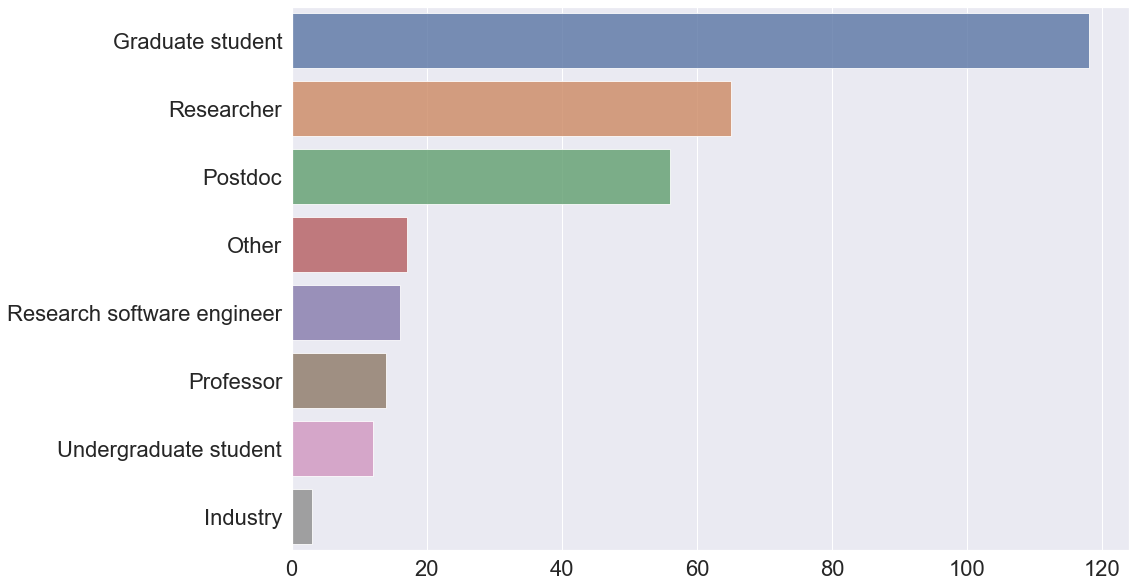

In [22]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts("your current position")
sns.barplot(y=keys, x=values, alpha=0.8)
f.savefig("figures/position.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

## Academic discipline

### All the CR workshops

values summing up to 838


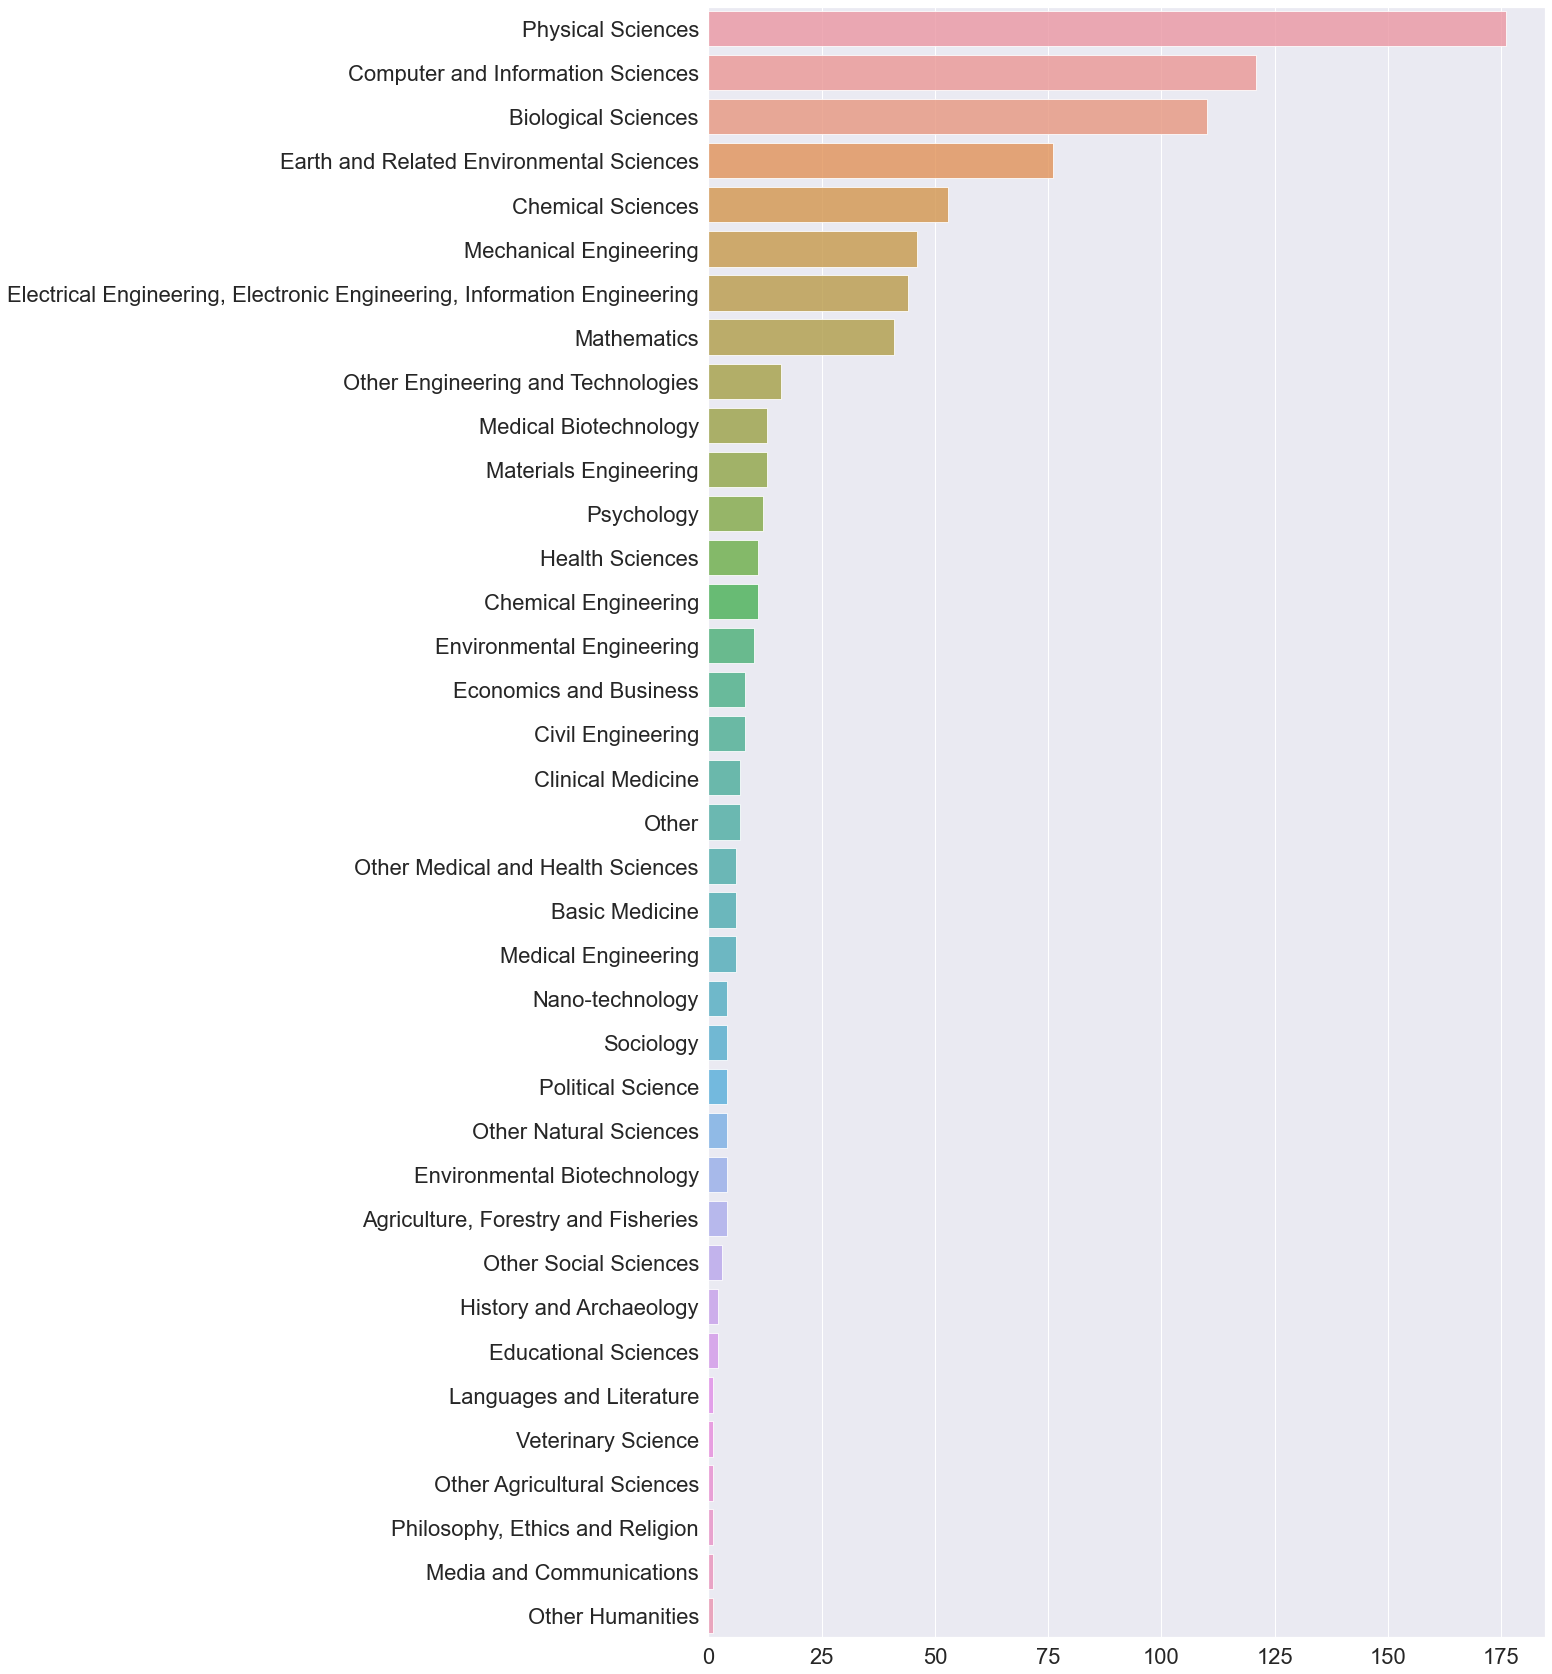

In [7]:
f, ax = plt.subplots(figsize=(15, 30))

keys, values = extract_counts("academic discipline")
sns.barplot(y=keys, x=values, alpha=0.8)
f.savefig("figures/discipline.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

### Online CR workshops

values summing up to 301


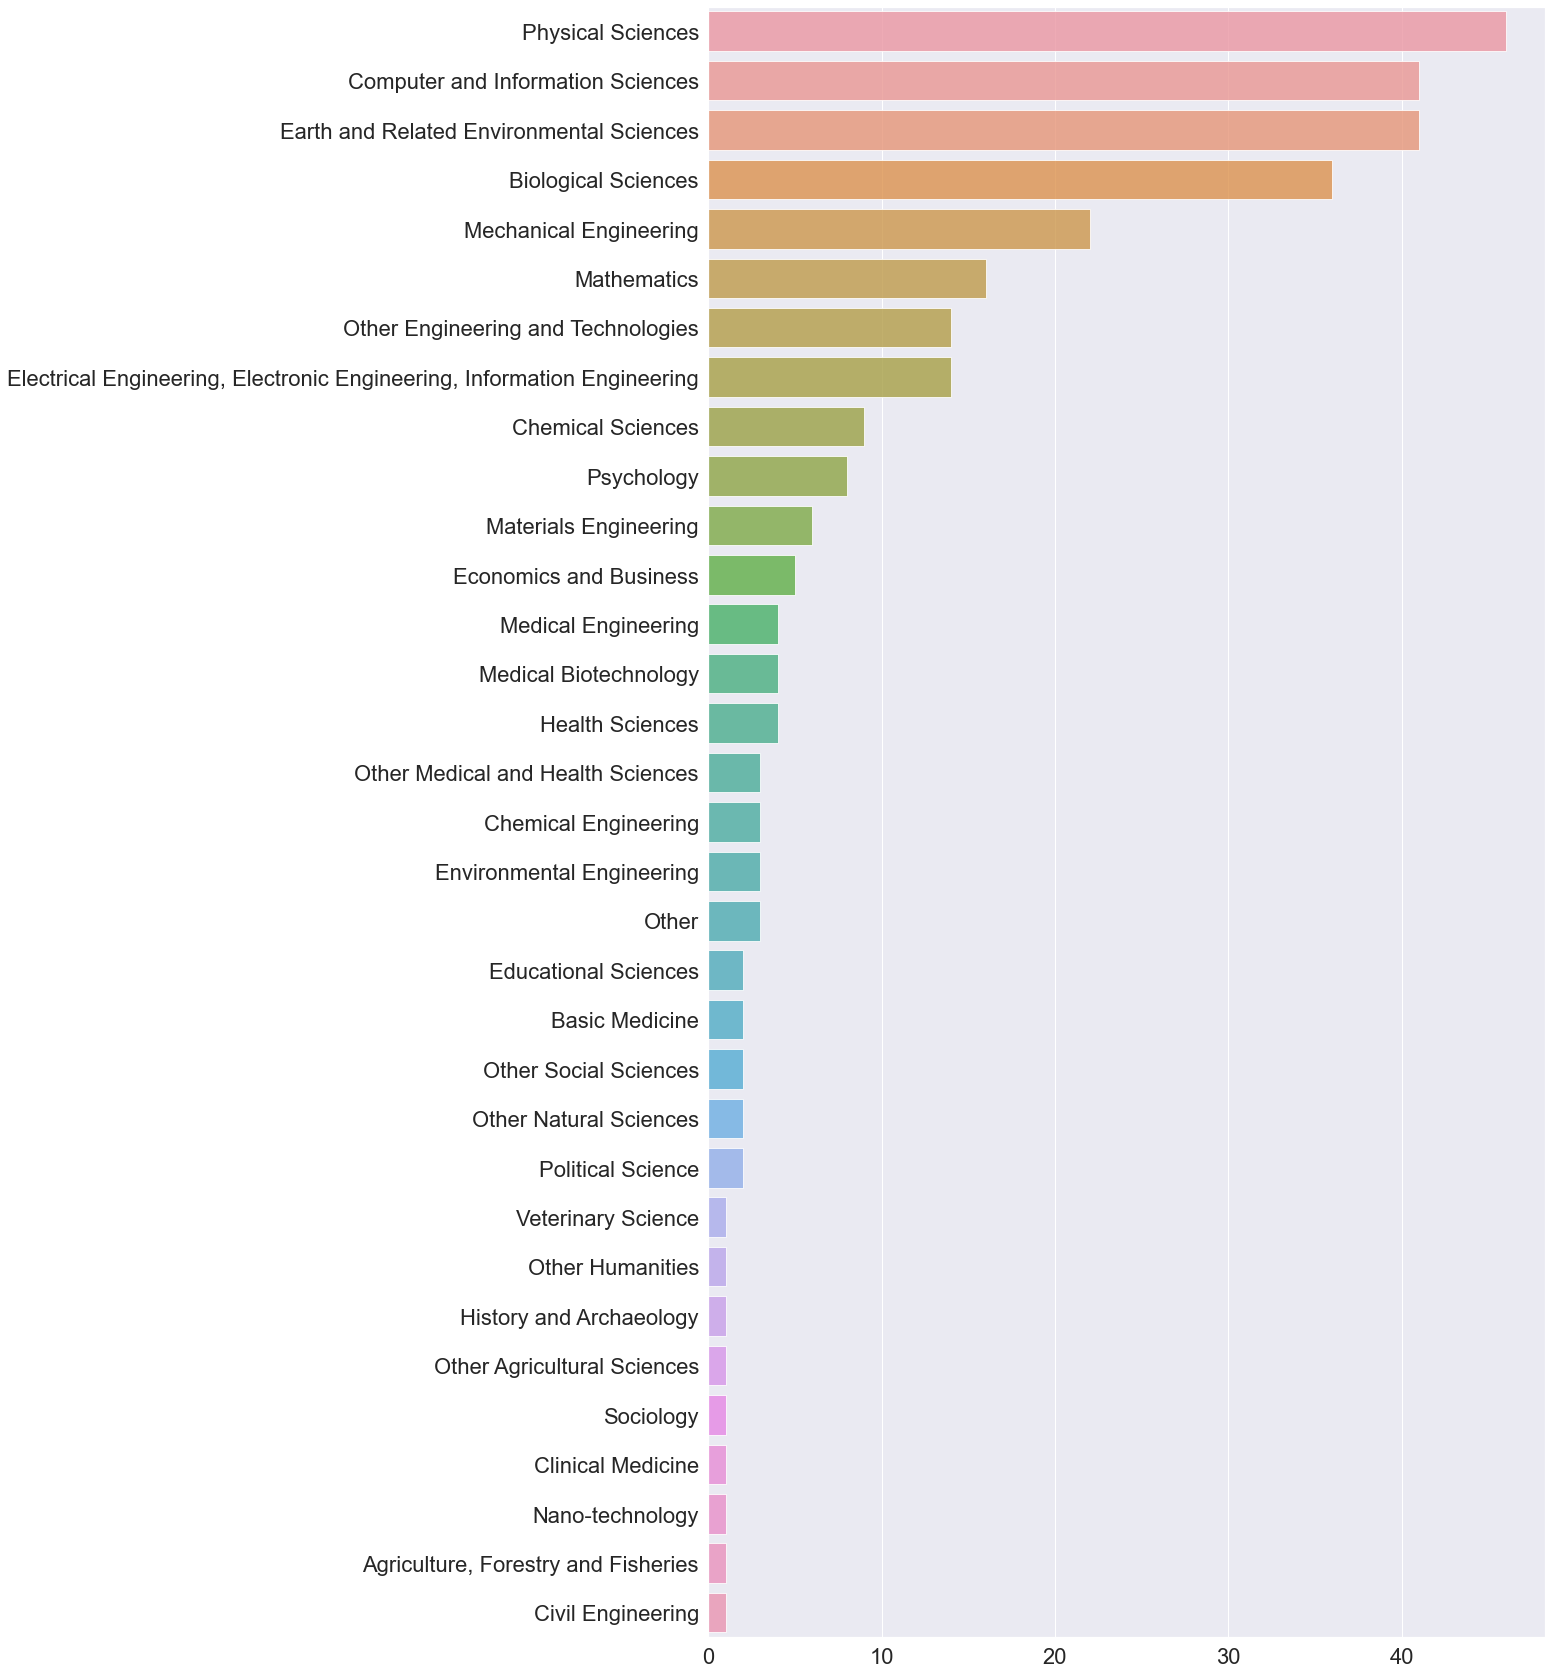

In [23]:
f, ax = plt.subplots(figsize=(15, 30))

keys, values = extract_counts_online("academic discipline")
sns.barplot(y=keys, x=values, alpha=0.8)
f.savefig("figures/discipline-online.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

## Operating system

### All the CR workshops

values summing up to 1067


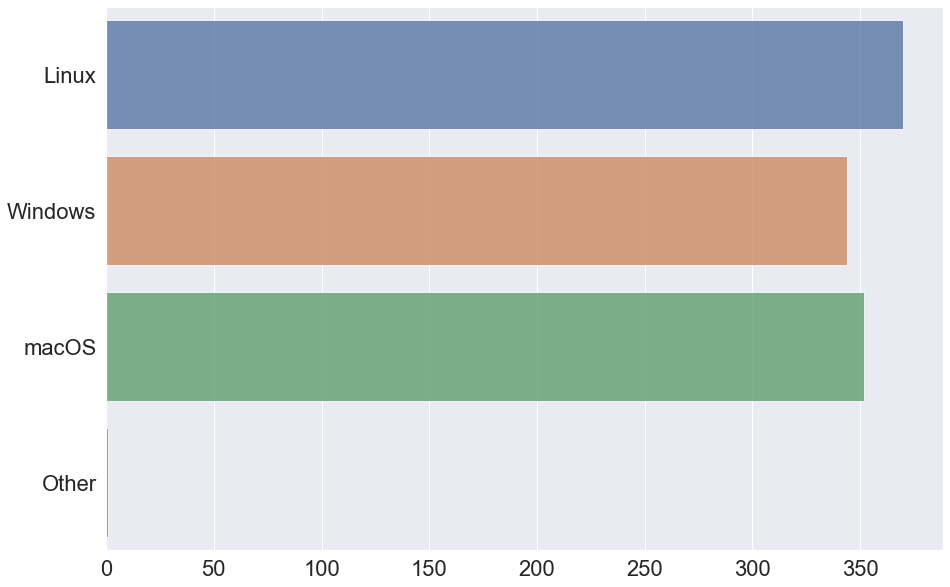

In [24]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts("operating system that you will use")
sns.barplot(y=keys, x=values, alpha=0.8)
f.savefig("figures/os.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

### Online CR workshops

values summing up to 301


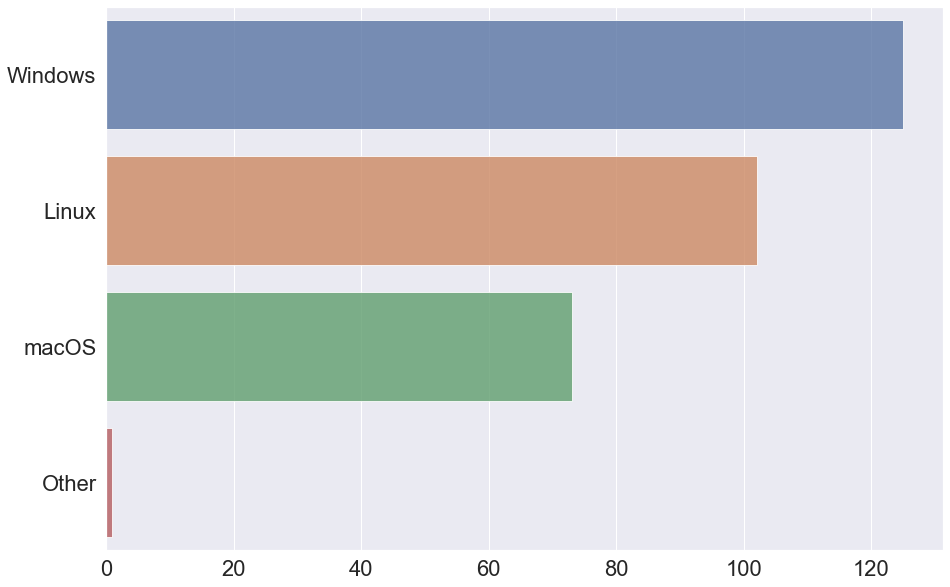

In [25]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts_online("operating system that you will use")
sns.barplot(y=keys, x=values, alpha=0.8)
f.savefig("figures/os-online.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

## Version control

### All the CR workshops

values summing up to 739


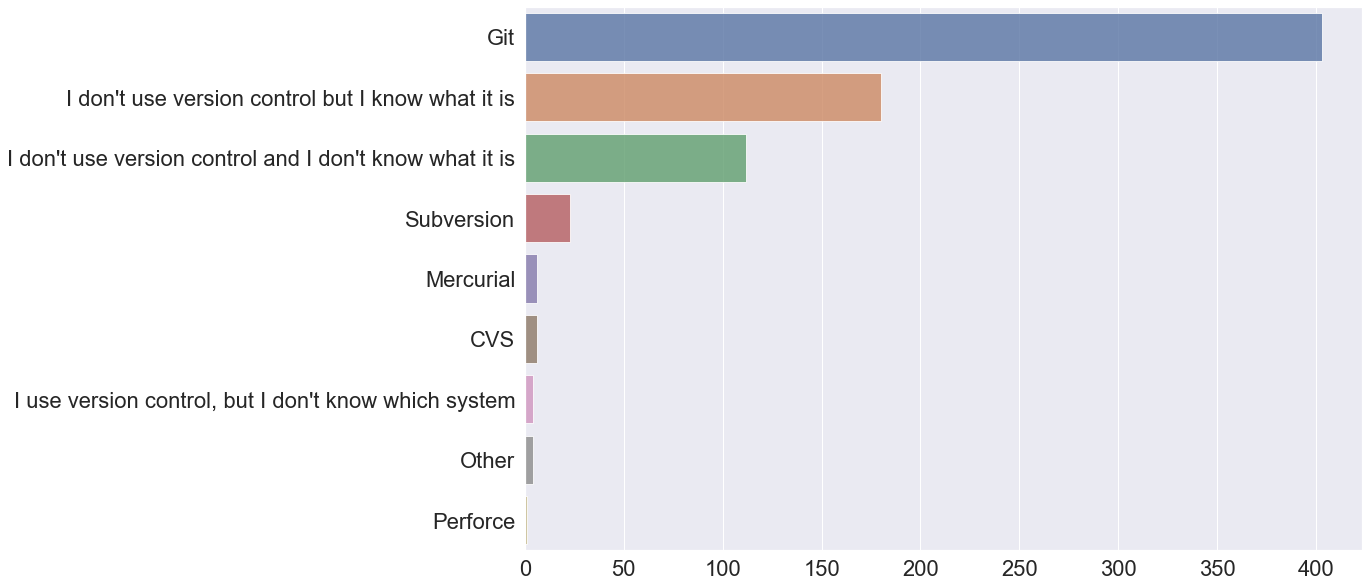

In [28]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts("Are you using version control")
keys, values = split_on_semicolon(keys, values)

sns.barplot(y=keys, x=values, alpha=0.8)
f.savefig("figures/version-control.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

### Online CR workshops

values summing up to 335


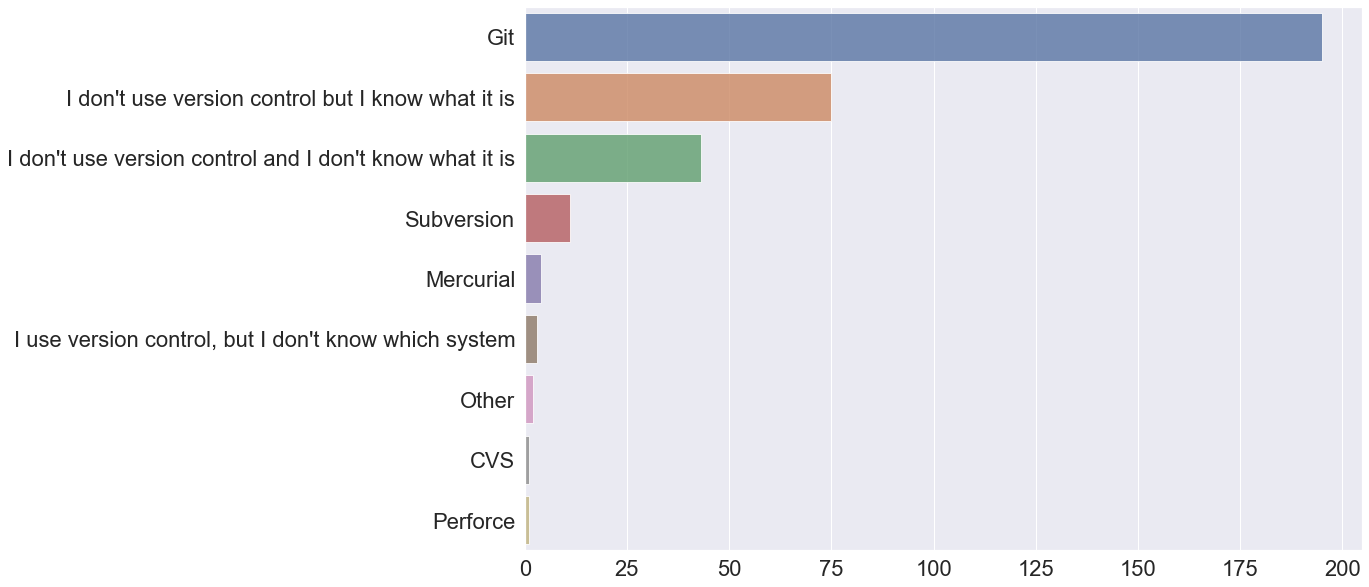

In [29]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts_online("Are you using version control")
keys, values = split_on_semicolon(keys, values)

sns.barplot(y=keys, x=values, alpha=0.8)
f.savefig("figures/version-control-online.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

## Programming languages

### All the CR workshops

values summing up to 1495


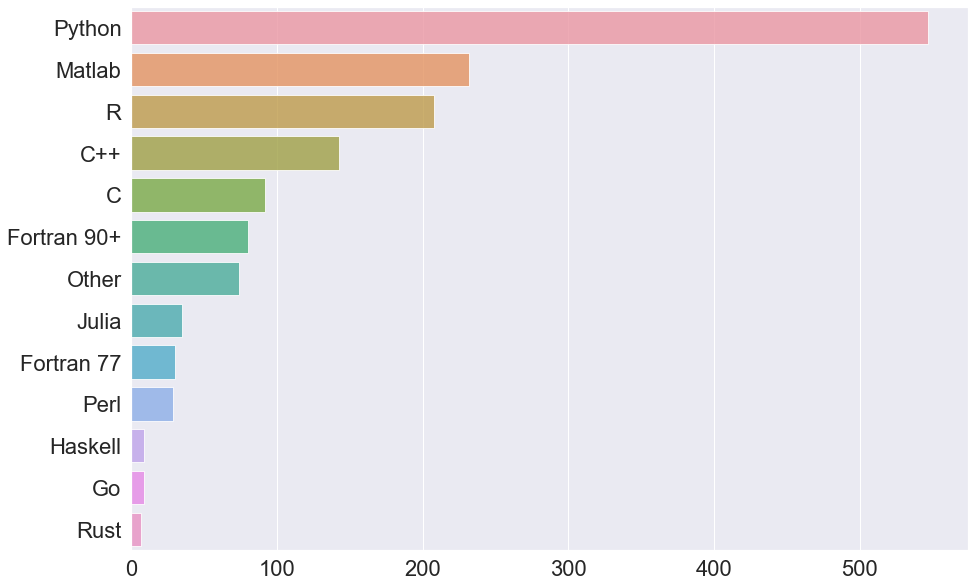

In [30]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts("Which programming languages are you using or will you use in your projects")
keys, values = split_on_semicolon(keys, values)

sns.barplot(y=keys, x=values, alpha=0.8)
f.savefig("figures/languages.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

### Online CR workshops

values summing up to 680


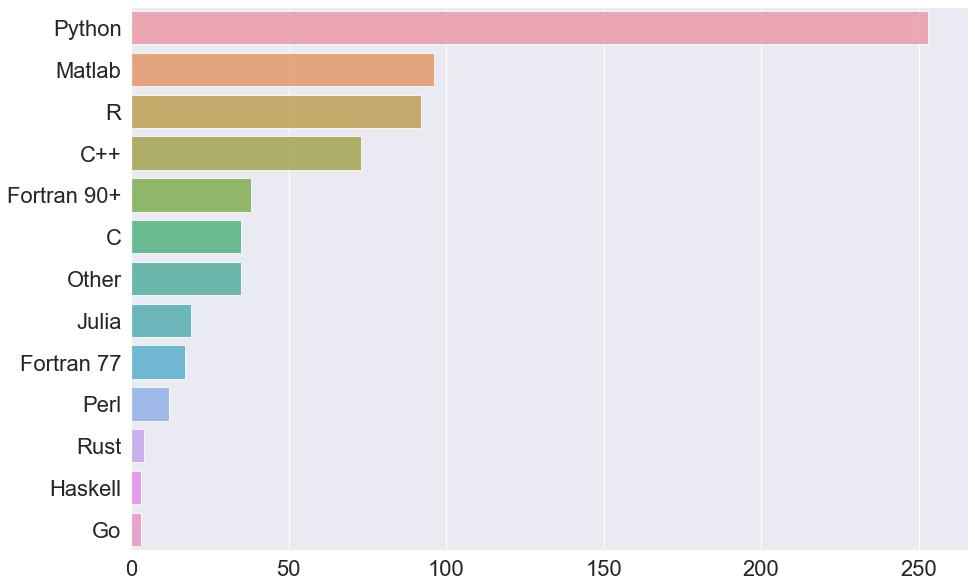

In [35]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts_online("Which programming languages are you using or will you use in your projects")
keys, values = split_on_semicolon(keys, values)

sns.barplot(y=keys, x=values, alpha=0.8)
f.savefig("figures/languages-online.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

## Writing tests

This question is also relatively new, and only online workshops' pre-workshop surveys cover this question.

values summing up to 301


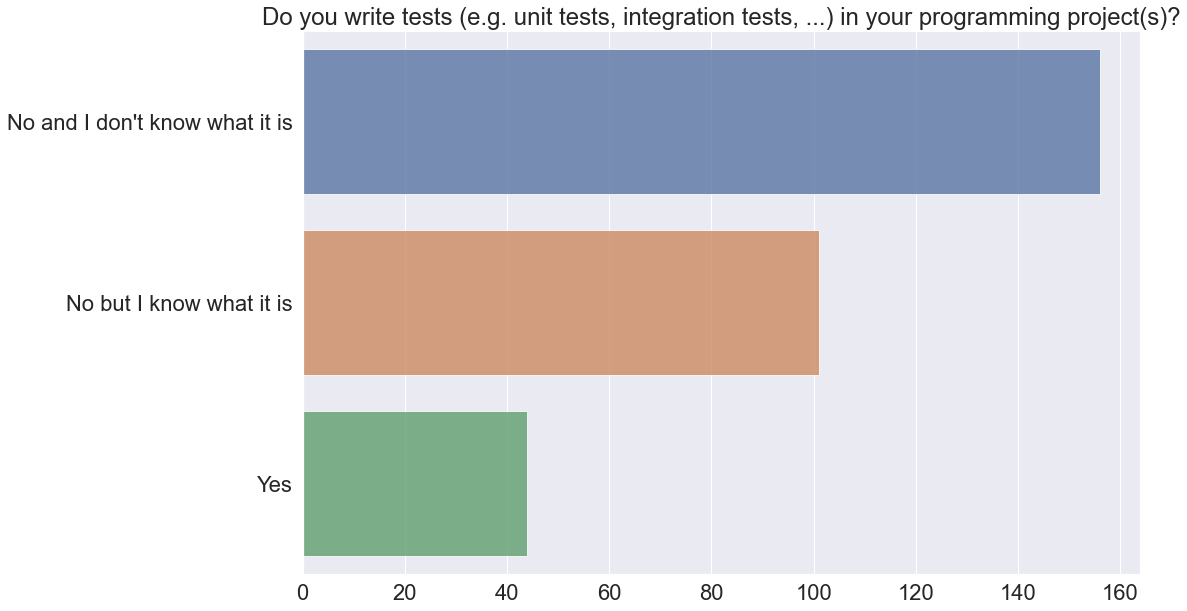

In [36]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts("Do you write tests")
keys, values = split_on_semicolon(keys, values)

sns.barplot(y=keys, x=values, alpha=0.8).set_title("Do you write tests (e.g. unit tests, integration tests, ...) in your programming project(s)?")
f.savefig("figures/tests.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

## Use of automated testing

### All the CR workshops

values summing up to 748


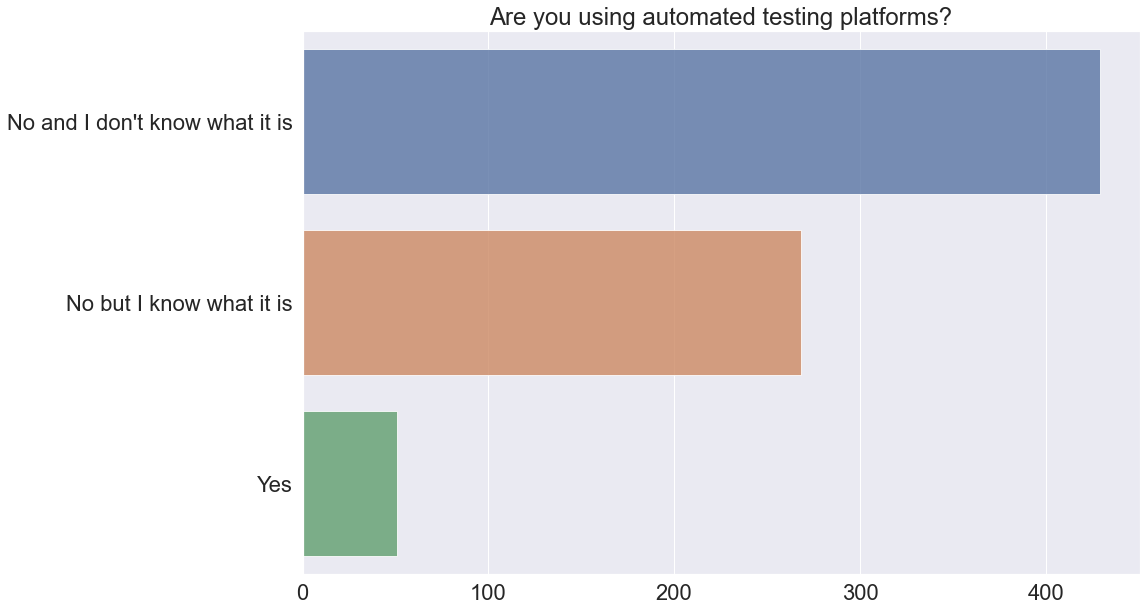

In [47]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts("Are you using automated testing")
keys, values = split_on_semicolon(keys, values)

sns.barplot(y=keys, x=values, alpha=0.8).set_title("Are you using automated testing platforms?")
f.savefig("figures/automated-testing.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

### Online CR workshops

values summing up to 301


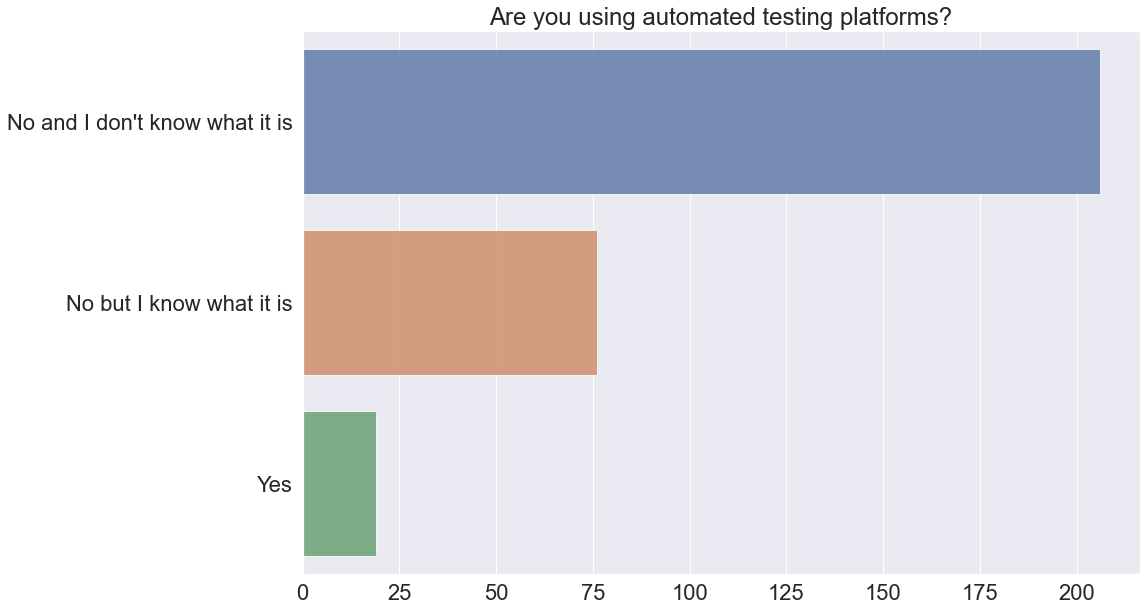

In [48]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts_online("Are you using automated testing")
keys, values = split_on_semicolon(keys, values)

sns.barplot(y=keys, x=values, alpha=0.8).set_title("Are you using automated testing platforms?")
f.savefig("figures/automated-testing-online.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

## Code review

In [37]:
### All the CR workshops

values summing up to 1049


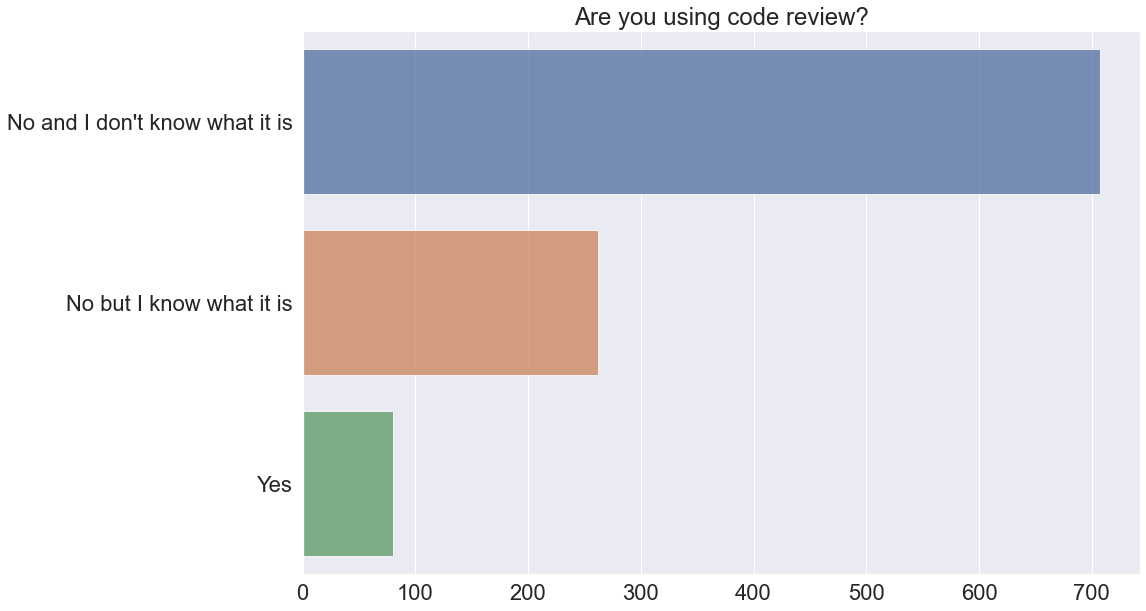

In [38]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts("code review")
keys, values = split_on_semicolon(keys, values)

sns.barplot(y=keys, x=values, alpha=0.8).set_title("Are you using code review?")
f.savefig("figures/code-review.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

### Online CR workshops

values summing up to 301


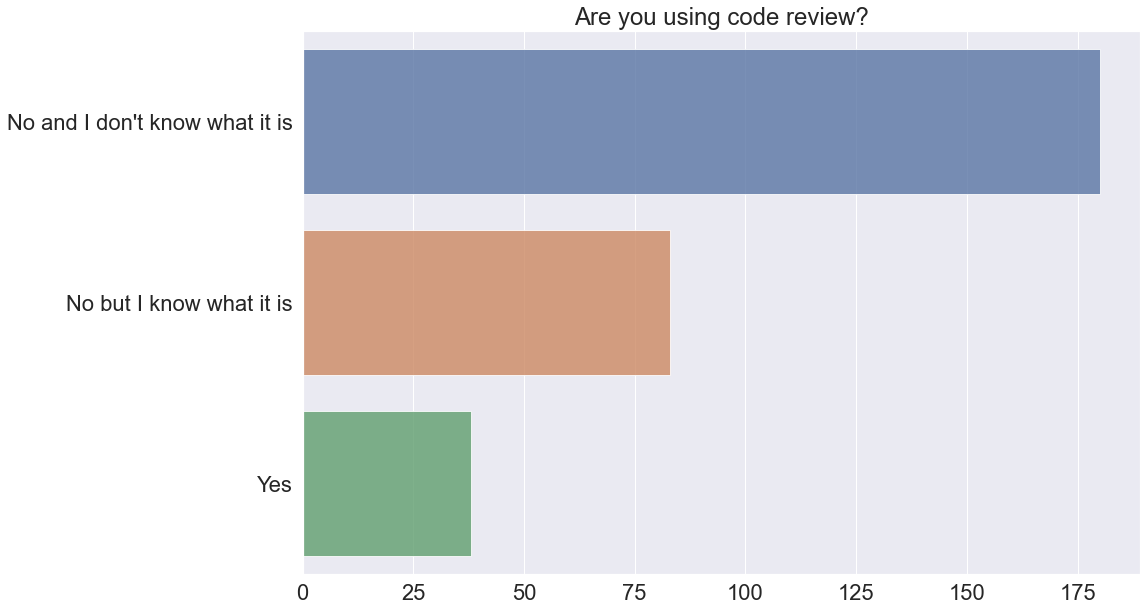

In [39]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts_online("code review")
keys, values = split_on_semicolon(keys, values)

sns.barplot(y=keys, x=values, alpha=0.8).set_title("Are you using code review?")
f.savefig("figures/code-review-online.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

## Jupyter

This question is also relatively new, and only online workshops' pre-workshop surveys cover this question.

values summing up to 301


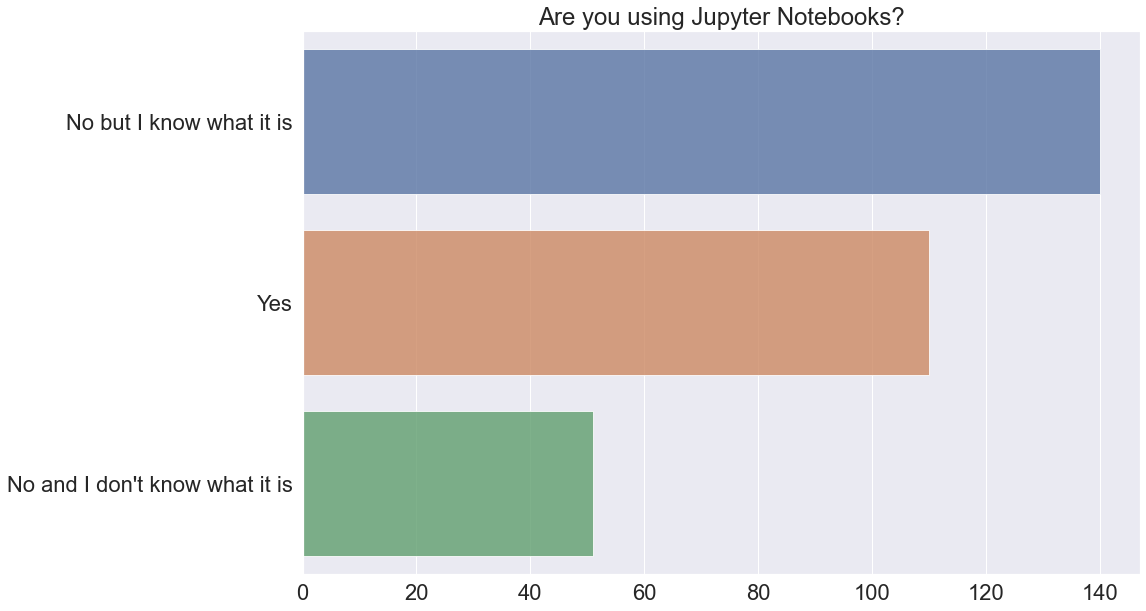

In [40]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts("Are you using Jupyter Notebooks in your programming")
keys, values = split_on_semicolon(keys, values)

sns.barplot(y=keys, x=values, alpha=0.8).set_title("Are you using Jupyter Notebooks?")
f.savefig("figures/jupyter.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

## Documentation

### All the CR workshops

values summing up to 1313


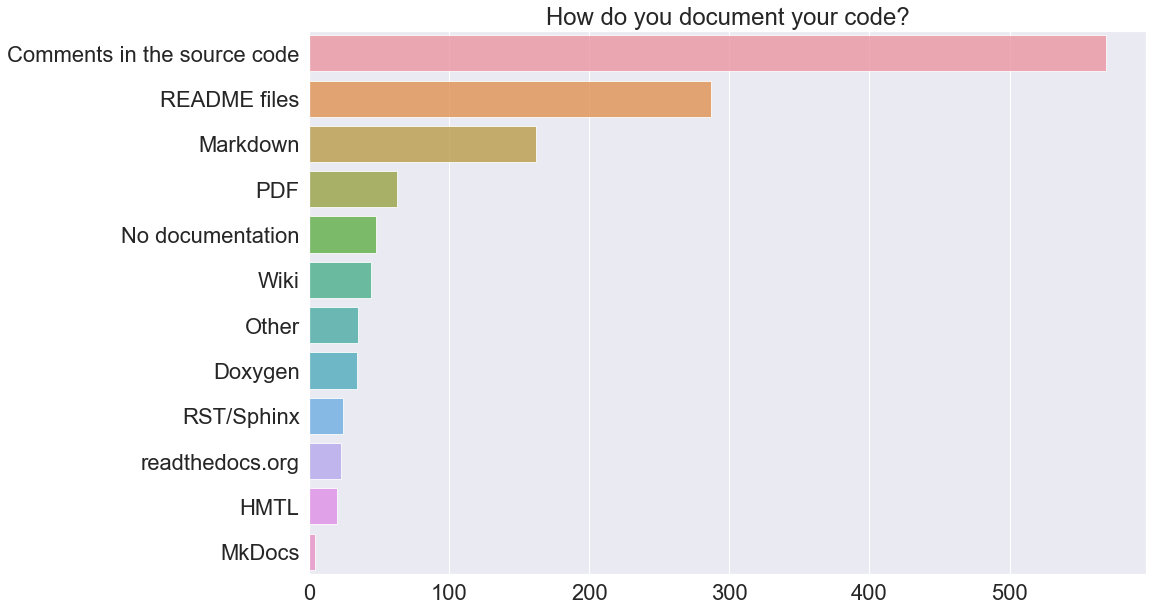

In [41]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts("How do you document your code?")
keys, values = split_on_semicolon(keys, values)

sns.barplot(y=keys, x=values, alpha=0.8).set_title("How do you document your code?")
f.savefig("figures/documentation.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

### Online CR workshops

values summing up to 655


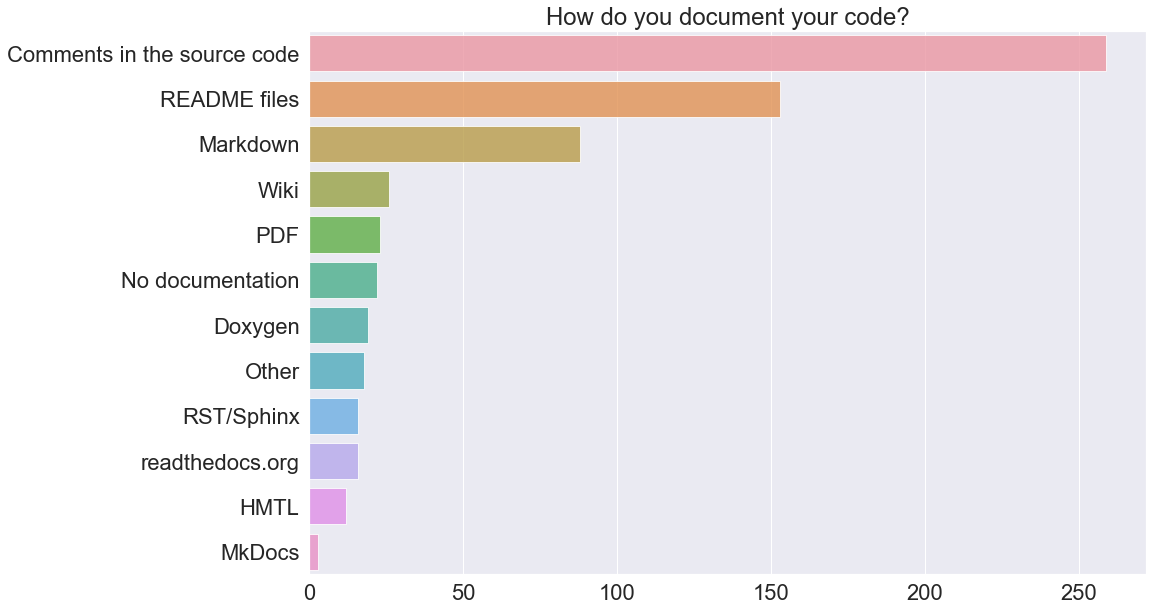

In [42]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts_online("How do you document your code?")
keys, values = split_on_semicolon(keys, values)

sns.barplot(y=keys, x=values, alpha=0.8).set_title("How do you document your code?")
f.savefig("figures/documentation-online.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

## Web-based collaborative tools

### All the CR workshops

values summing up to 805


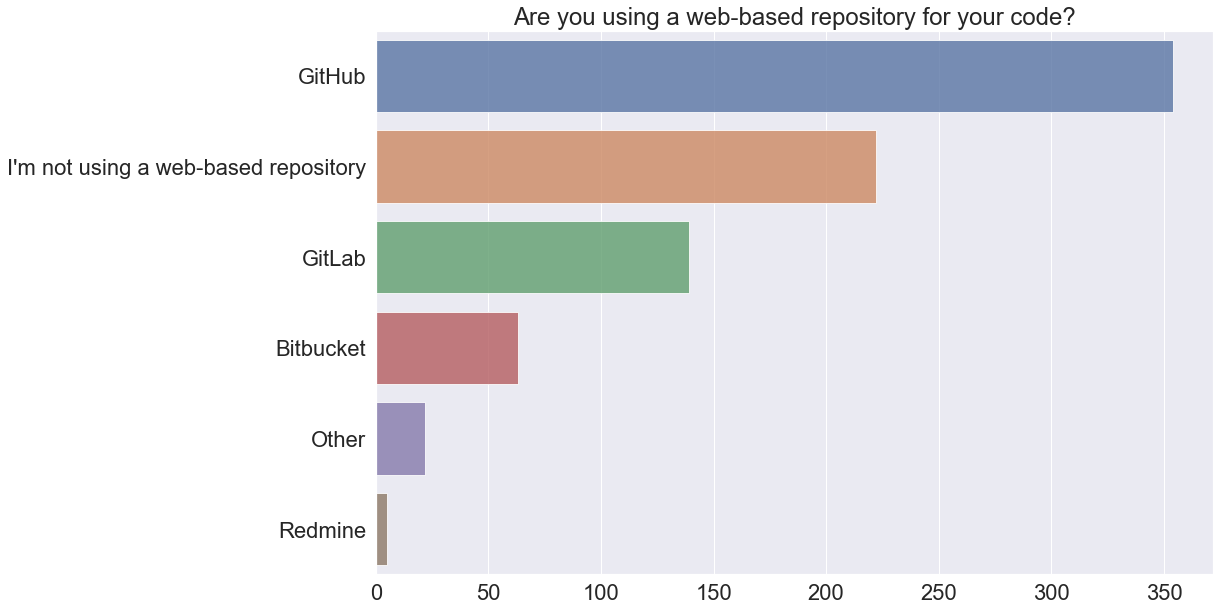

In [43]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts("Are you using a web-based repository for your code")
keys, values = split_on_semicolon(keys, values)

sns.barplot(y=keys, x=values, alpha=0.8).set_title("Are you using a web-based repository for your code?")
f.savefig("figures/web-tools.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

### Online CR workshops

values summing up to 368


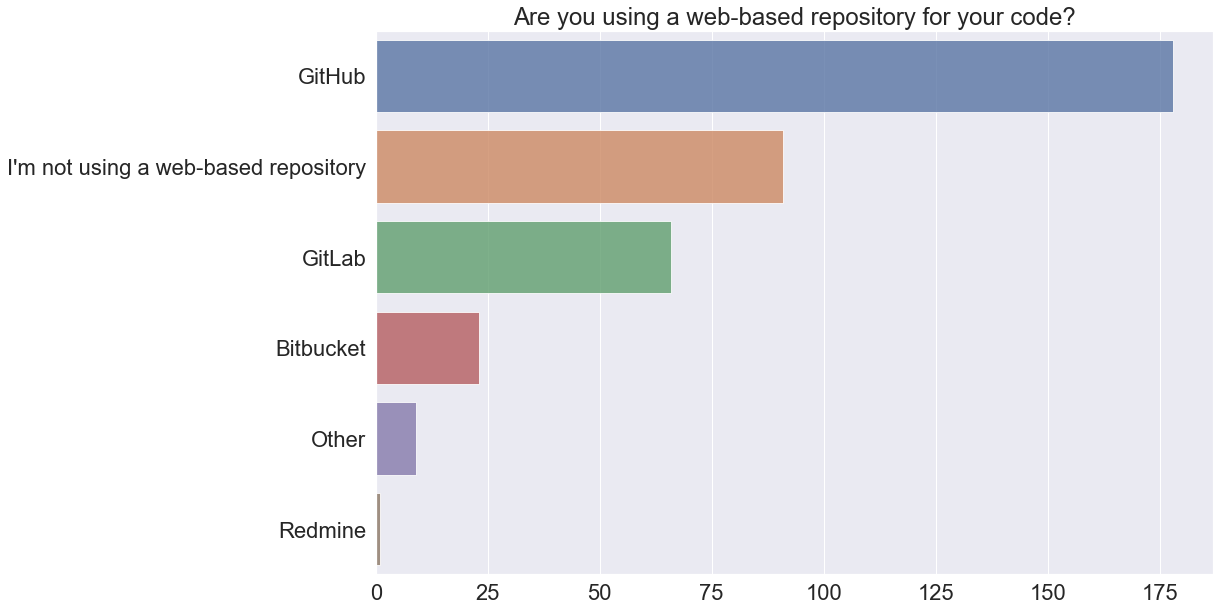

In [44]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts_online("Are you using a web-based repository for your code")
keys, values = split_on_semicolon(keys, values)

sns.barplot(y=keys, x=values, alpha=0.8).set_title("Are you using a web-based repository for your code?")
f.savefig("figures/web-tools-online.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

## Programming experience

### All the CR workshops

values summing up to 1070


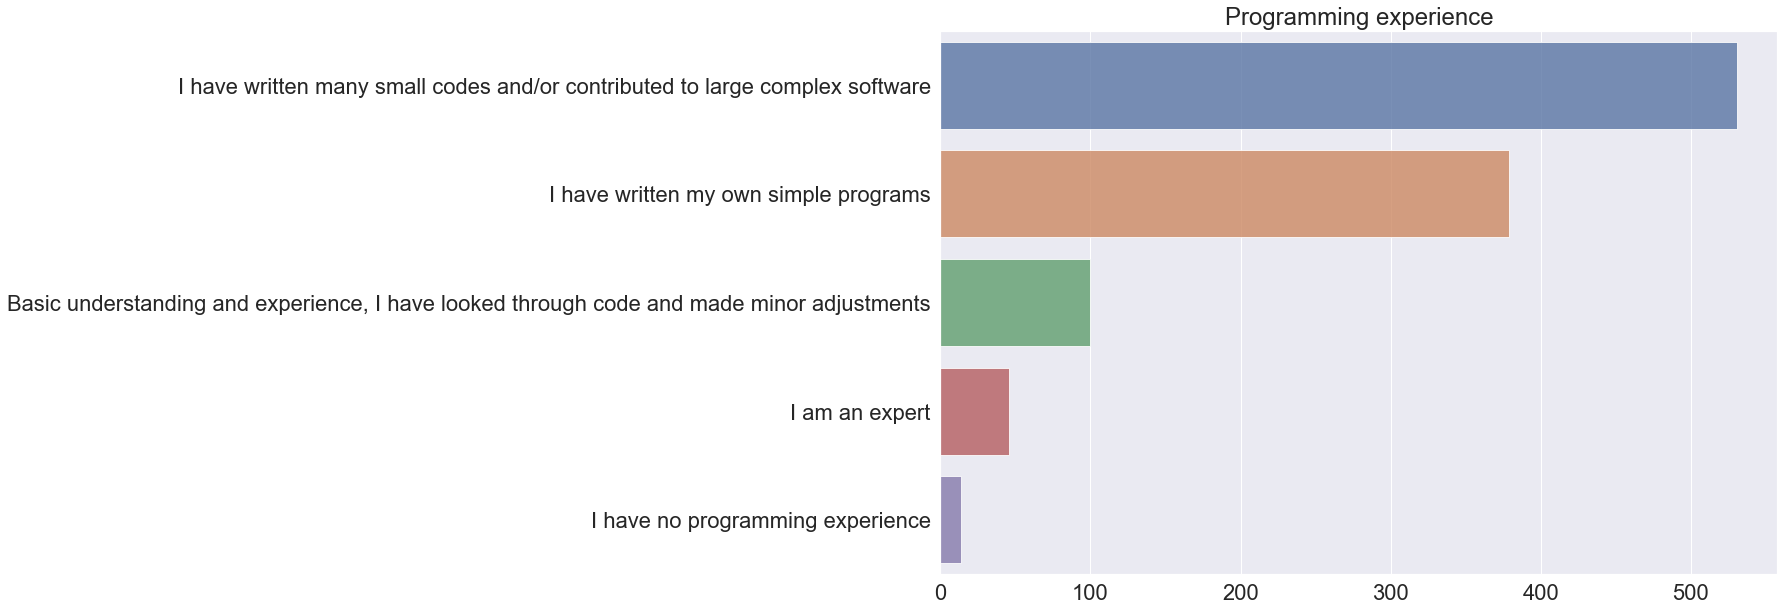

In [45]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts("How would you describe your programming experience")
keys, values = split_on_semicolon(keys, values)

sns.barplot(y=keys, x=values, alpha=0.8).set_title("Programming experience")
f.savefig("figures/programming-experience.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

### Online CR workshops

values summing up to 301


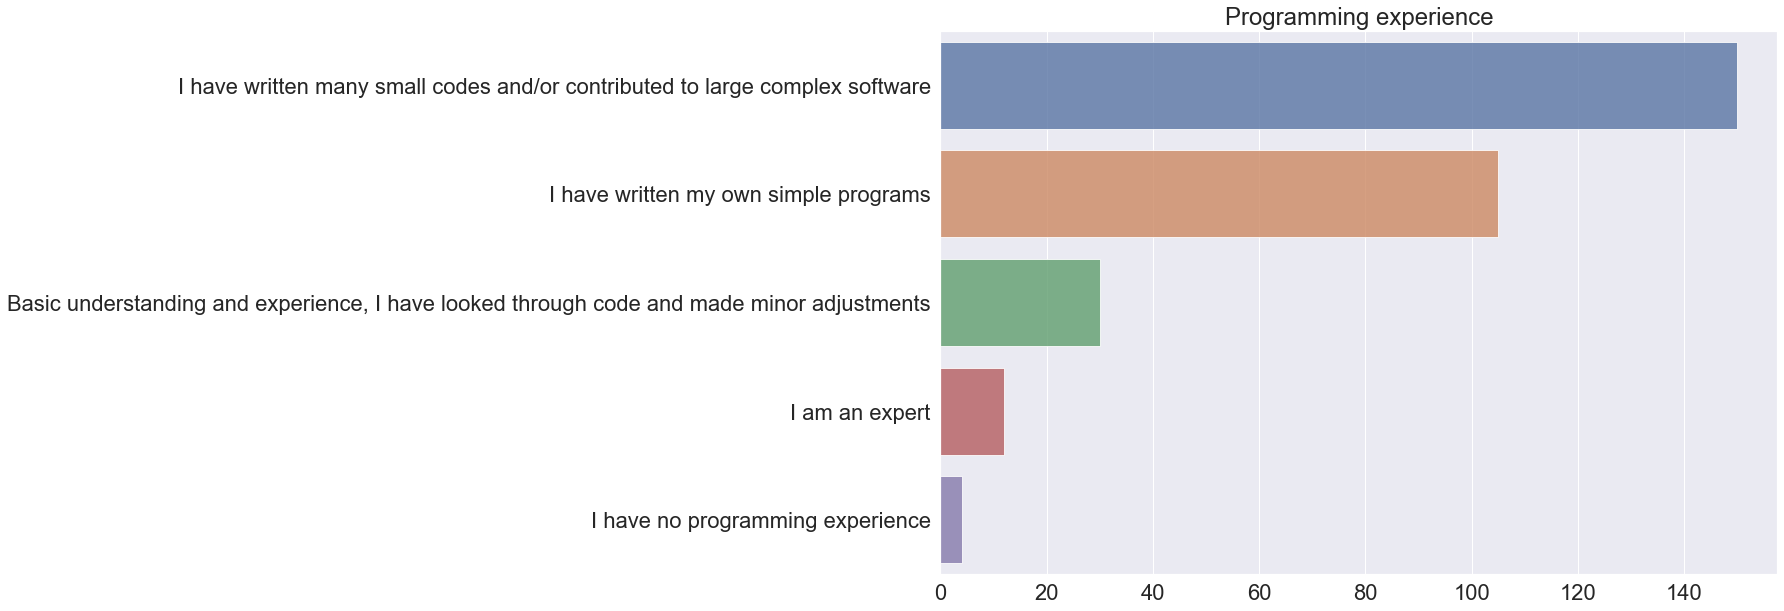

In [46]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts_online("How would you describe your programming experience")
keys, values = split_on_semicolon(keys, values)

sns.barplot(y=keys, x=values, alpha=0.8).set_title("Programming experience")
f.savefig("figures/programming-experience-online.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

## How did you find out about the project?

This question is also relatively new, and only online workshops' pre-workshop surveys cover this question.

values summing up to 299


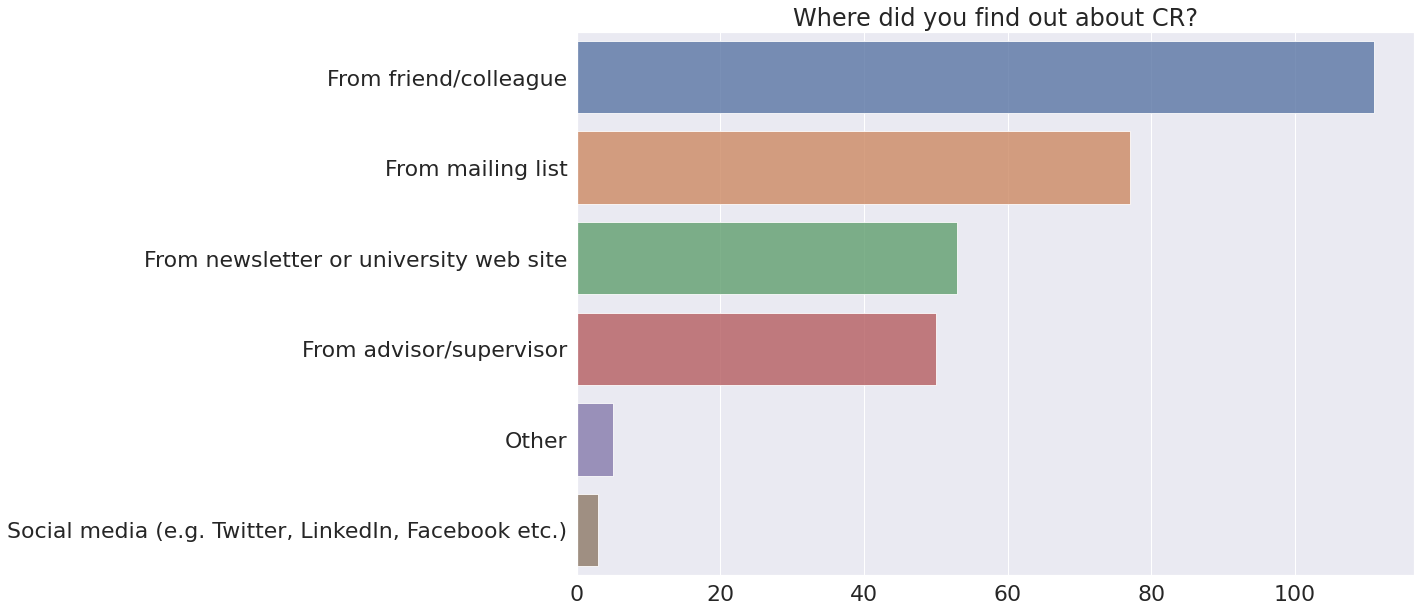

In [18]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts("Where did you find out")
keys, values = split_on_semicolon(keys, values)

sns.barplot(y=keys, x=values, alpha=0.8).set_title("Where did you find out about CR?")
f.savefig("figures/where.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")